In [146]:
import cooler
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import json
from io import StringIO


In [147]:
json_full =json.load(open("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/full/summary/parameters.json"))
json_roi_expected =json.load(open("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/expected/summary/parameters.json"))
json_roi_lowres =json.load(open("/Users/amulyagarimella/Documents/2241finalproject/outputs/imputed/HiCNN2/down16/roi/lowres/summary/parameters.json"))

In [171]:
dicts_for_df = []
for json, method in [(json_full, "Full HiCNN"), (json_roi_expected, "ROI HiCNN + Expected"), (json_roi_lowres, "ROI HiCNN + Lowres")]:
    for k, v in json.items():
        dict_for_df = {}
        for k2, v2 in v.items():
            for k3, v3 in v2.items():
                dict_for_df["path"] = k
                dict_for_df["Approach"] = method
                dict_for_df[k3] = v3
        dicts_for_df.append(dict_for_df)
        

In [172]:
# Convert nested JSON to Polars DataFrame
data = pl.from_dicts(dicts_for_df)

In [173]:
best_roi_model =data.filter(pl.col("ROI_METHOD") == "elasticnet").filter(pl.col("ROI_SPARSITY") == '0.5')

In [186]:
clr_orig = cooler.Cooler("/Users/amulyagarimella/Documents/2241finalproject/data/GM12878.GSE115524/GM12878.GSE115524.Homo_Sapiens.CTCF.b1.mcool::resolutions/10000")

clr_downsampled_16 = cooler.Cooler("/Users/amulyagarimella/Documents/2241finalproject/data/GM12878.GSE115524/processed/GM12878.GSE115524.Homo_Sapiens.CTCF.b1.ds.16.chr21.cool::/")

clr_roi_lowres_hicnn1 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Lowres").filter(pl.col("MODEL") == '1').select("path").unique().item() + "/21_predicted.cool")

clr_roi_lowres_hicnn2 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Lowres").filter(pl.col("MODEL") == '2').select("path").unique().item() + "/21_predicted.cool")

clr_roi_lowres_hicnn3 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Lowres").filter(pl.col("MODEL") == '3').select("path").unique().item() + "/21_predicted.cool")

clr_roi_expected_hicnn1 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Expected").filter(pl.col("MODEL") == '1').select("path").unique().item() + "/21_predicted.cool")

clr_roi_expected_hicnn2 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Expected").filter(pl.col("MODEL") == '2').select("path").unique().item() + "/21_predicted.cool")

clr_roi_expected_hicnn3 = cooler.Cooler(best_roi_model.filter(pl.col("Approach") == "ROI HiCNN + Expected").filter(pl.col("MODEL") == '3').select("path").unique().item() + "/21_predicted.cool")

clr_full_hicnn1 = cooler.Cooler(data.filter(pl.col("Approach") == "Full HiCNN").filter(pl.col("MODEL") == '1').select("path").unique().item() + "/21_predicted.cool")

clr_full_hicnn2 = cooler.Cooler(data.filter(pl.col("Approach") == "Full HiCNN").filter(pl.col("MODEL") == '2').select("path").unique().item() + "/21_predicted.cool")

clr_full_hicnn3 = cooler.Cooler(data.filter(pl.col("Approach") == "Full HiCNN").filter(pl.col("MODEL") == '3').select("path").unique().item() + "/21_predicted.cool")

In [187]:
clr_dict = {
    "Original": clr_orig,
    "Downsampled": clr_downsampled_16,
    "ROI HiCNN 1 + Lowres": clr_roi_lowres_hicnn1,
    "ROI HiCNN 2 + Lowres": clr_roi_lowres_hicnn2,
    "ROI HiCNN 3 + Lowres": clr_roi_lowres_hicnn3,
    "ROI HiCNN 1 + Expected": clr_roi_expected_hicnn1,
    "ROI HiCNN 2 + Expected": clr_roi_expected_hicnn2,
    "ROI HiCNN 3 + Expected": clr_roi_expected_hicnn3,
    "Full HiCNN 1": clr_full_hicnn1,
    "Full HiCNN 2": clr_full_hicnn2,
    "Full HiCNN 3": clr_full_hicnn3
}

In [188]:
chrom = "chr21"
start_px = 3000
size_px = 100
resol_bp = 10000

In [189]:
f"chr21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"

'chr21:30000000-31000000'

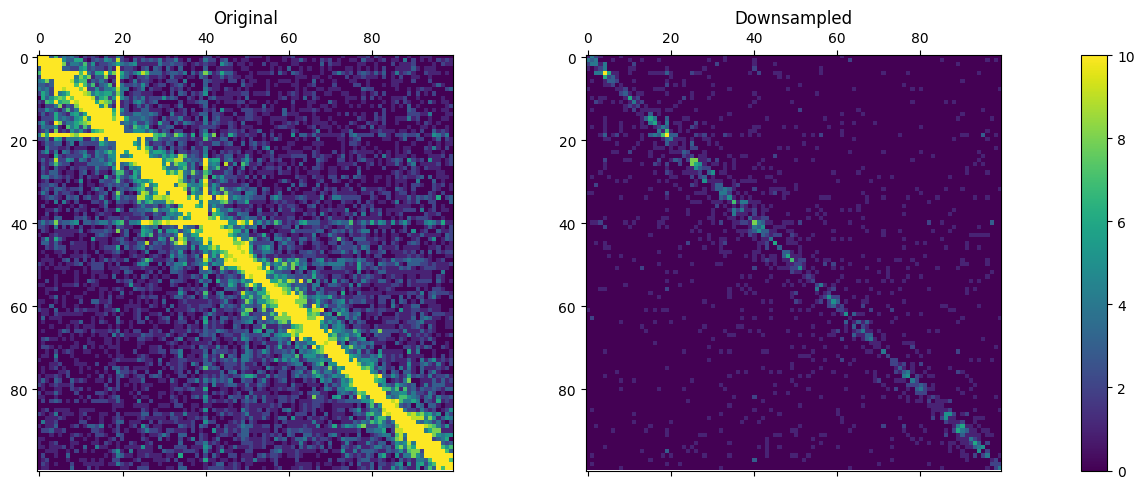

In [222]:
import matplotlib.gridspec as gridspec

# Create figure with GridSpec to allocate space for colorbar
fig = plt.figure(figsize=(12, 5))  # Slightly wider figure
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])  # 3 columns (2 plots + colorbar)

# Create subplots
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plot matrices
img0 = ax0.matshow(clr_orig.matrix(balance=False).fetch(f"chr21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"), vmax=10)
ax0.set_title("Original")

img1 = ax1.matshow(clr_downsampled_16.matrix(balance=False).fetch(f"chr21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"), vmax=10)
ax1.set_title("Downsampled")

# Add colorbar in its own subplot
cbar_ax = plt.subplot(gs[2])
fig.colorbar(img1, cax=cbar_ax)

plt.tight_layout()
plt.show()

[('ROI HiCNN 1 + Lowres', <Cooler "21_predicted.cool::/">),
 ('ROI HiCNN 2 + Lowres', <Cooler "21_predicted.cool::/">),
 ('ROI HiCNN 3 + Lowres', <Cooler "21_predicted.cool::/">),
 ('ROI HiCNN 1 + Expected', <Cooler "21_predicted.cool::/">),
 ('ROI HiCNN 2 + Expected', <Cooler "21_predicted.cool::/">),
 ('ROI HiCNN 3 + Expected', <Cooler "21_predicted.cool::/">),
 ('Full HiCNN 1', <Cooler "21_predicted.cool::/">),
 ('Full HiCNN 2', <Cooler "21_predicted.cool::/">),
 ('Full HiCNN 3', <Cooler "21_predicted.cool::/">)]

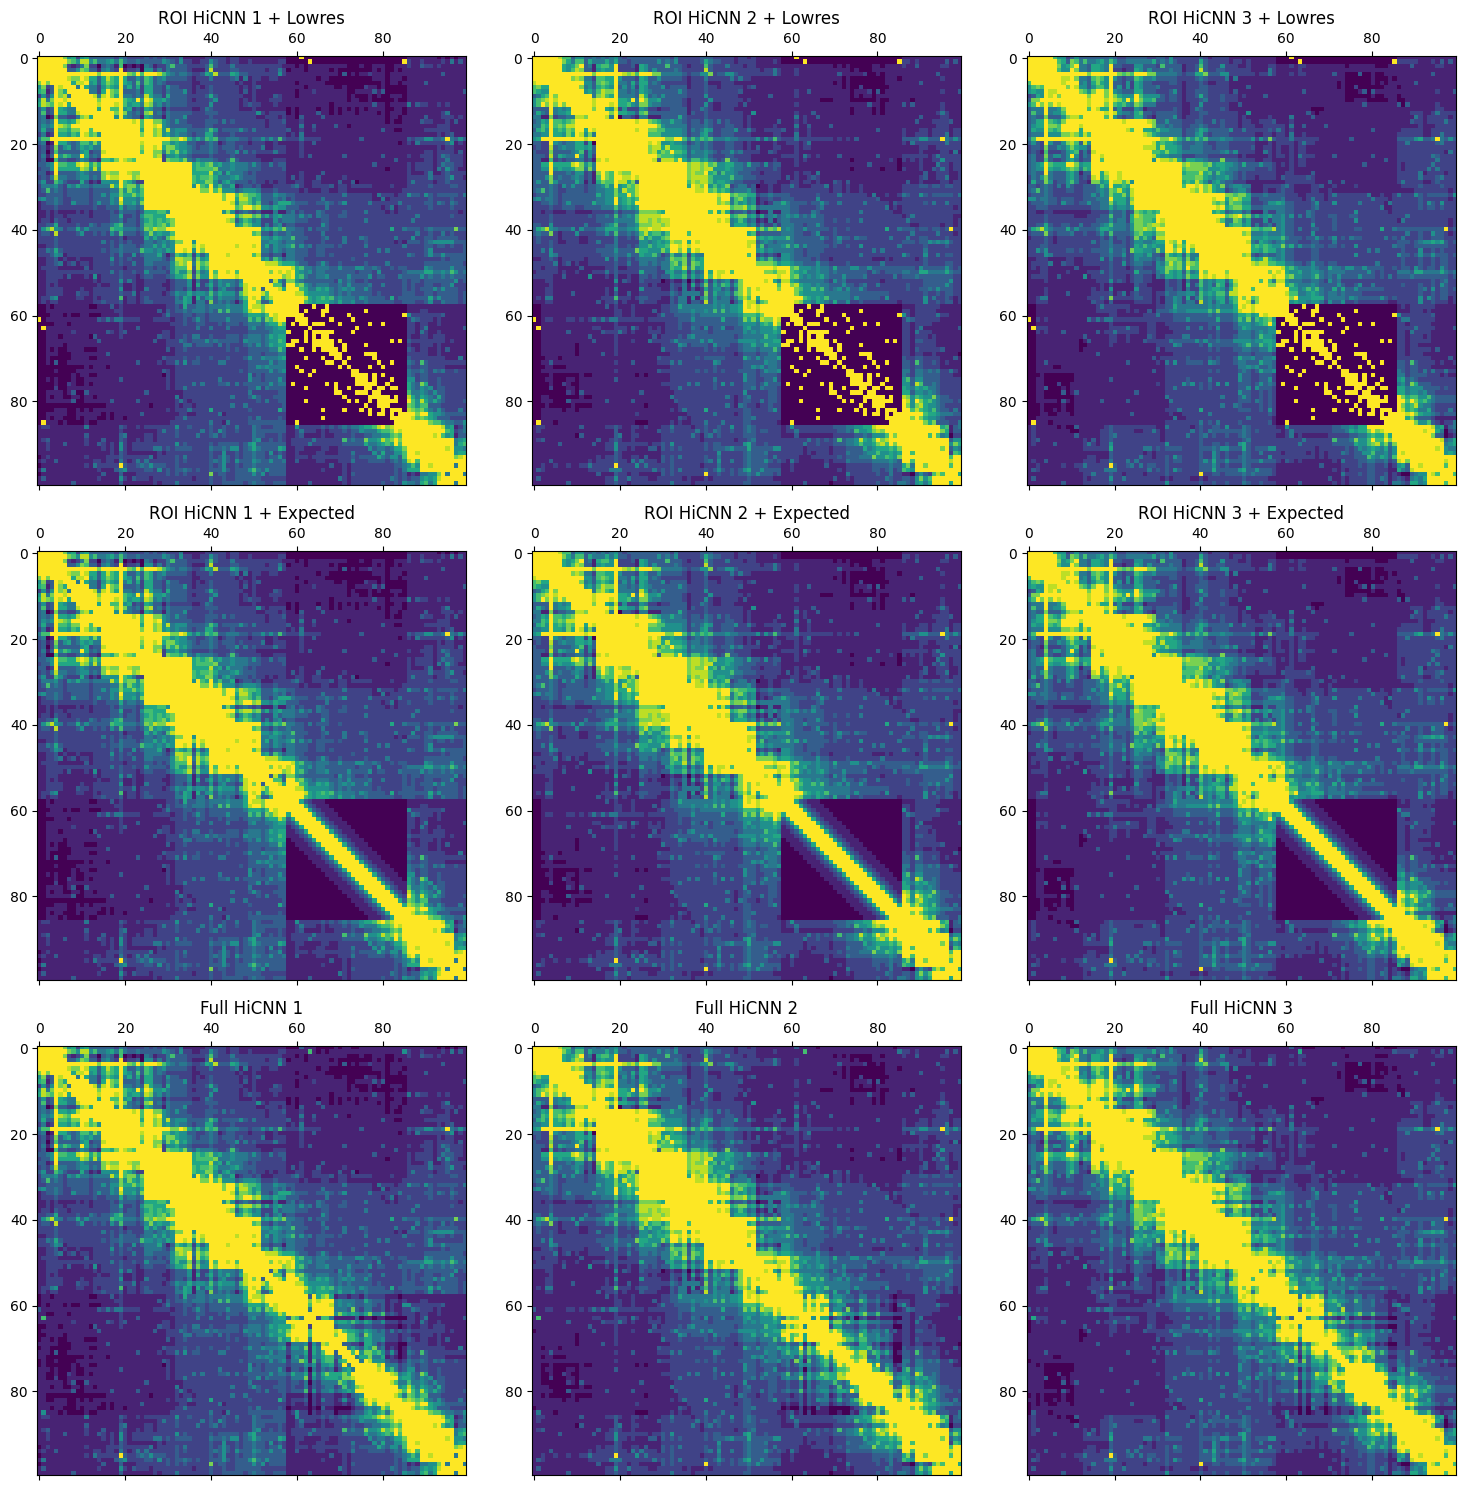

In [213]:
# Determine grid layout based on number of items
n = len(list(clr_dict.items())[2:])
n_cols = min(3, n)  # Max 3 columns
n_rows = (n + n_cols - 1) // n_cols  # Calculate needed rows

# Create figure with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# Flatten axes if needed
axes_flat = axes.flatten()

# Plot each matrix in its own subplot
for i, (title, clr) in enumerate(list(clr_dict.items())[2:]):
    
    ax = axes_flat[i]
    img = ax.matshow(clr.matrix(balance=False).fetch(f"chr21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"), 
                    vmax=10)
    
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [15]:
print(len(np.where(clr_orig.matrix(balance=False).fetch("chr21") >0)[0]))
print(len(np.where(clr_full.matrix(balance=False).fetch("chr21") >0)[0]))
print(len(np.where(clr_roi.matrix(balance=False).fetch("21") >0)[0]))

867562
1330886
500493


In [16]:
clr_orig.chromsizes["chr21"]

np.int32(46709983)

In [17]:
clr_roi.chromsizes

name
21    46710000
Name: length, dtype: int32

In [18]:
clr_full.chromsizes

name
chr21    46710000
Name: length, dtype: int32

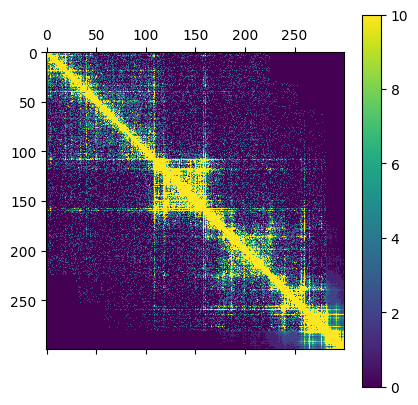

In [19]:
plt.matshow(clr_roi.matrix(balance=False).fetch(f"21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"), vmax=10)
plt.colorbar()

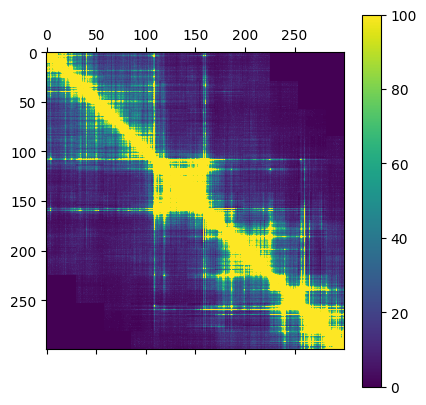

In [20]:
plt.matshow(clr_full.matrix(balance=False).fetch(f"chr21:{start_px*resol_bp}-{start_px*resol_bp+size_px*resol_bp}"), vmax=100)
plt.colorbar()